# 초음파 광물 예측 데이터

- 1988년 존스홉킨스대학교의 세즈노프스키 교수가 1986년 힌튼 교수(딥러닝의 아버지, 한층더 쌓으면 된다!)가 발표한 역전파 알고리즘에 관심을 갖고 은닉층과역전파의 효과를 실험하기 위해 정리한 데이터

- 광석화 일반 돌에 각각 음파 탐지기를 쏜 후 그 결과를 정리

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm 

In [36]:
df = pd.read_csv("./data/sonar.csv", header = None)

In [37]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [38]:
df[60].value_counts() # 종속변수확인

60
M    111
R     97
Name: count, dtype: int64

In [39]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [40]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

In [41]:
# 종속변수를 변환해줘야함
# 원핫인코딩 해줌
df = pd.get_dummies(df, drop_first = True)

In [64]:
df["60_R"].value_counts() # 종속변수확인

60_R
False    111
True      97
Name: count, dtype: int64

- 단위가 좀 다른듯 싶으면서도... 같은 느낌인데...일단 0과 1사이의 값을 가진다

# 독립변수에 문제가 있다

In [82]:
x = df.drop(["60_R"], axis = 1)
y = df["60_R"]

In [83]:
model_sm = sm.OLS(y, x)
model_sm = model_sm.fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   60_R   R-squared (uncentered):                 -21.321
Model:                            OLS   Adj. R-squared (uncentered):            -30.370
Method:                 Least Squares   F-statistic:                             -2.356
Date:                Tue, 02 Dec 2025   Prob (F-statistic):                        1.00
Time:                        16:03:50   Log-Likelihood:                         -63.008
No. Observations:                 208   AIC:                                      246.0
Df Residuals:                     148   BIC:                                      446.3
Df Model:                          60                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             -1.8293      2.105     -0.869      0.386      -5.990       2.331
1             -1.9009      1.932     -0.984      0.327      -5.718       1.916
2              6.3402      1.858      3.412      0.001       2.668      10.012
3             -3.2678      1.483     -2.203      0.029      -6.199      -0.337
4              0.0375      1.082      0.035      0.972      -2.101       2.176
5             -1.0544      1.056     -0.998      0.320      -3.141       1.033
6              1.3208      1.055      1.252      0.212      -0.763       3.405
7              0.7639      0.813      0.940      0.349      -0.843       2.370
8             -0.8235      0.812     -1.014      0.312      -2.428       0.781
9              0.5696      0.738      0.772      0.441      -0.888       2.027
10            -0.6615      0.847     -0.781      0.436      -2.335       1.012
11            -0.6029      0.681     -0.885      0.378      -1.949       0.743
12            -0.5273      0.691     -0.763      0.447      -1.893       0.838
13             0.1974      0.616      0.321      0.749      -1.019       1.414
14            -0.1363      0.624     -0.218      0.827      -1.369       1.096
15             0.5060      0.607      0.833      0.406      -0.694       1.706
16             0.5659      0.642      0.882      0.379      -0.702       1.834
17            -0.7359      0.612     -1.203      0.231      -1.945       0.473
18             0.6039      0.534      1.131      0.260      -0.451       1.659
19            -0.5690      0.599     -0.949      0.344      -1.754       0.616
20             0.8978      0.592      1.516      0.132      -0.273       2.068
21            -0.6992      0.607     -1.152      0.251      -1.899       0.500
22             0.5472      0.612      0.894      0.373      -0.662       1.756
23            -1.0526      0.621     -1.696      0.092      -2.279       0.174
24             0.6408      0.587      1.092      0.277      -0.519       1.801
25             0.3078      0.615      0.500      0.618      -0.908       1.524
26            -0.2479      0.607     -0.408      0.684      -1.448       0.953
27             0.1013      0.559      0.181      0.856      -1.004       1.206
28             0.9799      0.495      1.980      0.050       0.002       1.958
29            -1.8206      0.515     -3.533      0.001      -2.839      -0.802
30             2.2034      0.528      4.171      0.000       1.159       3.247
31            -1.0172      0.506     -2.011      0.046      -2.017      -0.018
32             0.2922      0.523      0.559      0.577      -0.741       1.326
33             0.7263      0.528      1.376      0.171      -0.317       1.769
34            -1.1919      0.508     -2.345      0.020      -

In [43]:
# 일단 설정

In [65]:
# 종속변수 스케일링~~~
stay_index = df[df["60_R"] == 0].sample(97, random_state = 666).index.tolist() 
out_index = df[df["60_R"] == 1].index.tolist() 

random_index = stay_index + out_index


sample_x = x.iloc[random_index]
sample_y = df["60_R"][random_index]


In [66]:
x_train, x_test, y_train, y_test = train_test_split(
    sample_x,
    sample_y,
    test_size = 0.2,
    stratify=sample_y,
    random_state=666
)

ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

In [67]:
x_train.shape

(155, 60)

In [68]:
# 입력층(60개의 독립변수가 있으니까)
inputs = keras.Input(shape = (60,))

# 은닉층(내마음)
dense1 = keras.layers.Dense(100, activation = "relu") 

# 출력층(M 또는 R  2개의 종속변수의 확률값이 필요하니까) 
dense2 = keras.layers.Dense(2, activation = "softmax")


model = keras.Sequential()
model.add(inputs)
model.add(dense1)
model.add(dense2)

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 100)                 │           6,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │             202 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,302 (24.62 KB)

 Trainable params: 6,302 (24.62 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:

# 종속변수가 범주형이므로 categorical_crossentropy
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history = model.fit(
    scaled_train, 
    y_train, 
    epochs= 50, 
    batch_size=32,
    validation_data = (scaled_test, y_test),
)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.4774 - loss: 0.7917 - val_accuracy: 0.4872 - val_loss: 0.7824
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6839 - loss: 0.6124 - val_accuracy: 0.6154 - val_loss: 0.6727
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7548 - loss: 0.5108 - val_accuracy: 0.6667 - val_loss: 0.6112
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8065 - loss: 0.4518 - val_accuracy: 0.6667 - val_loss: 0.5702
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8323 - loss: 0.4087 - val_accuracy: 0.6667 - val_loss: 0.5376
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8452 - loss: 0.3723 - val_accuracy: 0.7436 - val_loss: 0.5091
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8710 - loss: 0.3405 - val_accuracy: 0.7436 - val_loss: 0.4843
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8839 - loss: 0.3140 - val_accuracy: 0.7692 - val_loss: 0.4651


# 일반화 성능 보기

In [70]:
model.evaluate(scaled_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8462 - loss: 0.3631


[0.36306464672088623, 0.8461538553237915]

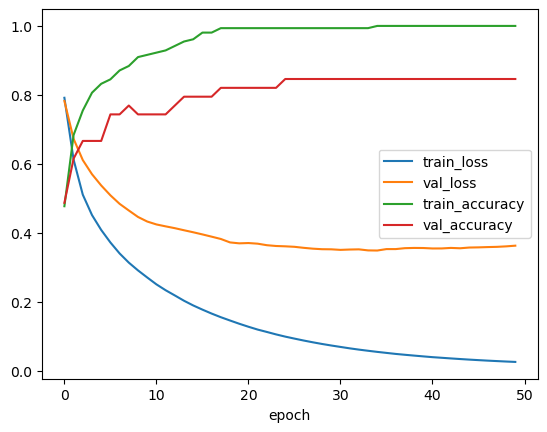

In [71]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")

plt.plot(history.history["accuracy"], label = "train_accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")

plt.legend()
plt.xlabel("epoch")
plt.show()

- 과대적합 방지해야겠져~~

# 드롭아웃 적용

In [79]:
# 입력층(60개의 독립변수가 있으니까)
inputs = keras.Input(shape = (60,))

# 은닉층(내마음)
dense1 = keras.layers.Dense(30, activation = "relu") 

# 출력층(M 또는 R  2개의 종속변수의 확률값이 필요하니까) 
dense2 = keras.layers.Dense(2, activation = "softmax")

# 드롭아웃
dropout = keras.layers.Dropout(0.3)

model_2 = keras.Sequential()
model_2.add(inputs)
model_2.add(dense1)
model_2.add(dropout) # 드롭아웃 적용~~
model_2.add(dense2)


model_2.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history2 = model.fit(
    scaled_train, 
    y_train, 
    epochs= 200, 
    batch_size=4,
    validation_data = (scaled_test, y_test),
)

Epoch 1/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.0014e-04 - val_accuracy: 0.8462 - val_loss: 0.5252
Epoch 2/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.7080e-04 - val_accuracy: 0.8462 - val_loss: 0.5257
Epoch 3/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.4723e-04 - val_accuracy: 0.8462 - val_loss: 0.5298
Epoch 4/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.2313e-04 - val_accuracy: 0.8462 - val_loss: 0.5309
Epoch 5/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.0236e-04 - val_accuracy: 0.8462 - val_loss: 0.5354
Epoch 6/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.7885e-04 - val_accuracy: 0.8462 - val_loss: 0.5349
Epoch 7/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.6253e-04 - val_accuracy: 0.8462 - val_loss: 0.5388
Epoch 8/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.455

In [80]:
# 일반화 성능
model_2.evaluate(scaled_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5897 - loss: 0.7929 


[0.7928524613380432, 0.5897436141967773]

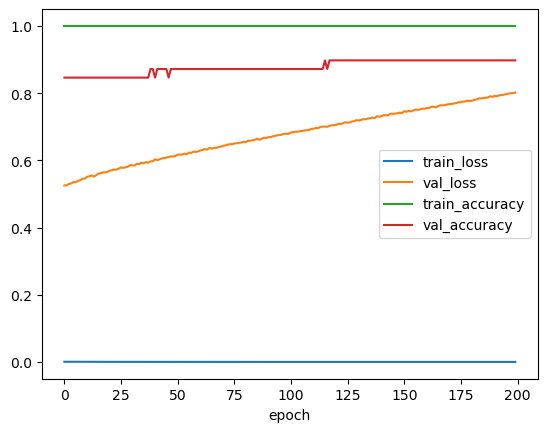

In [81]:
# Dropout 적용
plt.figure()

plt.plot(history2.history["loss"], label = "train_loss")
plt.plot(history2.history["val_loss"], label = "val_loss")

plt.plot(history2.history["accuracy"], label = "train_accuracy")
plt.plot(history2.history["val_accuracy"], label = "val_accuracy")

plt.legend()
plt.xlabel("epoch")
plt.show()

## 슬픈 결과... 거의 뭐 갔습니다

# 독립변수 재설정

In [113]:
x = df[[2,3,29,30,31,34,35,49,54]]
y = df["60_R"]

In [114]:
# 종속변수 스케일링~~~
stay_index = df[df["60_R"] == 0].sample(97, random_state = 666).index.tolist() 
out_index = df[df["60_R"] == 1].index.tolist() 

random_index = stay_index + out_index


sample_x = x.iloc[random_index]
sample_y = df["60_R"][random_index]

In [115]:
x_train, x_test, y_train, y_test = train_test_split(
    sample_x,
    sample_y,
    test_size = 0.2,
    stratify=sample_y,
    random_state=666
)

ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

In [116]:
x_train.shape

(155, 9)

In [117]:
# 입력층(60개의 독립변수가 있으니까)
inputs = keras.Input(shape = (9,))

# 은닉층(내마음)
dense1 = keras.layers.Dense(100, activation = "relu") 

# 출력층(M 또는 R  2개의 종속변수의 확률값이 필요하니까) 
dense2 = keras.layers.Dense(2, activation = "softmax")

dropout = keras.layers.Dropout(0.3)

model3 = keras.Sequential()
model3.add(inputs)
model3.add(dense1)
model3.add(dropout)
model3.add(dense2)

model3.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 100)                 │           1,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 2)                   │             202 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,202 (4.70 KB)

 Trainable params: 1,202 (4.70 KB)

 Non-trainable params: 0 (0.00 B)

In [118]:
# 얼리얼리 해버리기
es_cb = keras.callbacks.EarlyStopping(
    patience= 2, # 인내심, 몇 에포크를 지켜볼것인가
    restore_best_weights=True 
)

In [119]:
# 종속변수가 범주형이므로 categorical_crossentropy
model3.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history3 = model3.fit(
    scaled_train, 
    y_train, 
    epochs= 200, 
    batch_size=8,
    validation_data = (scaled_test, y_test),
    callbacks =[es_cb],
)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4387 - loss: 0.7443 - val_accuracy: 0.6667 - val_loss: 0.6629
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5161 - loss: 0.7047 - val_accuracy: 0.7692 - val_loss: 0.6251
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6387 - loss: 0.6261 - val_accuracy: 0.7692 - val_loss: 0.6044
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6129 - loss: 0.6272 - val_accuracy: 0.7949 - val_loss: 0.5861
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6129 - loss: 0.6269 - val_accuracy: 0.7692 - val_loss: 0.5750
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6710 - loss: 0.5991 - val_accuracy: 0.7692 - val_loss: 0.5673
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6774 - loss: 0.5925 - val_accuracy: 0.7692 - val_loss: 0.5585
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6774 - loss: 0.5789 - val_accuracy: 0.7692 - 

In [120]:
model3.evaluate(scaled_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8205 - loss: 0.4569


[0.4569165110588074, 0.8205128312110901]

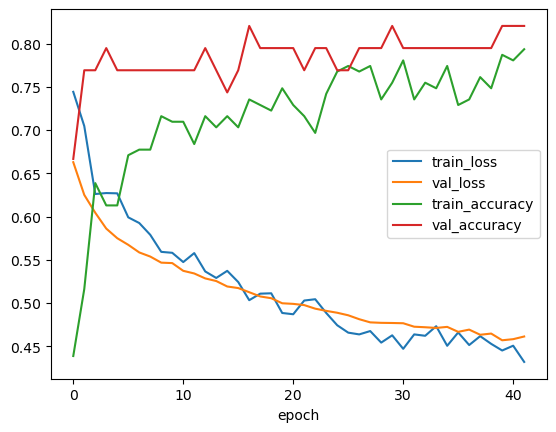

In [121]:
plt.figure()

plt.plot(history3.history["loss"], label = "train_loss")
plt.plot(history3.history["val_loss"], label = "val_loss")

plt.plot(history3.history["accuracy"], label = "train_accuracy")
plt.plot(history3.history["val_accuracy"], label = "val_accuracy")

plt.legend()
plt.xlabel("epoch")
plt.show()

# 한 것
- 종속변수 스케일링함
- dropout 적용함
- 얼리스탑 적용함
- 유의성 없는 독립변수 싹 삭제함

- es_cb.stopped_epoch => 41

- 40 이 딱 좋은~~~

In [123]:
val_labels = np.argmax(model3.predict(scaled_test), axis =-1)

print("예측값", val_labels)
print("정답값", y_test.values)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
예측값 [0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1
 1 1]
정답값 [False False  True False  True False False  True False  True  True  True
 False False  True False  True False False  True False False False  True
  True  True  True False False  True  True False  True False False  True
 False  True  True]


In [125]:
# 정확도 계산
np.mean(val_labels == y_test.values)

np.float64(0.8205128205128205)

# train_test_split 두번 나눌것입니다~~

In [177]:
x = df[[2,3,29,30,31,34,35,49,54]]
y = df["60_R"]

# 종속변수 스케일링~~~
stay_index = df[df["60_R"] == 0].sample(97, random_state = 666).index.tolist() 
out_index = df[df["60_R"] == 1].index.tolist() 

random_index = stay_index + out_index

sample_x = x.iloc[random_index]
sample_y = df["60_R"][random_index]


x_train, x_test, y_train, y_test = train_test_split(
    sample_x,
    sample_y,
    test_size = 0.2,
    stratify=sample_y,
    random_state=666
)

ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

In [178]:
# 입력층(60개의 독립변수가 있으니까)
inputs = keras.Input(shape = (9,))

# 은닉층(내마음)
dense1 = keras.layers.Dense(100, activation = "relu") 

# 출력층(M 또는 R  2개의 종속변수의 확률값이 필요하니까) 
dense2 = keras.layers.Dense(2, activation = "softmax")

dropout = keras.layers.Dropout(0.3)

model4 = keras.Sequential()
model4.add(inputs)
model4.add(dense1)
model4.add(dropout)
model4.add(dense2)

model4.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                     │ (None, 100)                 │           1,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 2)                   │             202 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,202 (4.70 KB)

 Trainable params: 1,202 (4.70 KB)

 Non-trainable params: 0 (0.00 B)

In [179]:
# 얼리얼리 해버리기
es_cb = keras.callbacks.EarlyStopping(
    patience= 2, # 인내심, 몇 에포크를 지켜볼것인가
    restore_best_weights=True 
)


# 종속변수가 범주형이므로 categorical_crossentropy
model4.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
history4 = model4.fit(
    scaled_train, 
    y_train, 
    epochs= 200, 
    batch_size= 4,
    validation_data = (scaled_test, y_test),
    callbacks =[es_cb],
)

Epoch 1/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5742 - loss: 0.6898 - val_accuracy: 0.6410 - val_loss: 0.6247
Epoch 2/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6581 - loss: 0.6247 - val_accuracy: 0.7179 - val_loss: 0.5934
Epoch 3/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6710 - loss: 0.5886 - val_accuracy: 0.6667 - val_loss: 0.5768
Epoch 4/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6581 - loss: 0.5836 - val_accuracy: 0.6923 - val_loss: 0.5691
Epoch 5/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6903 - loss: 0.5773 - val_accuracy: 0.7179 - val_loss: 0.5592
Epoch 6/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7161 - loss: 0.5399 - val_accuracy: 0.7179 - val_loss: 0.5537
Epoch 7/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7226 - loss: 0.5378 - val_accuracy: 0.6923 - val_loss: 0.5462
Epoch 8/200
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7226 - loss: 0.5315 - val_accuracy: 0.6923 - v

In [180]:
model4.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6667 - loss: 0.6327


[0.6326780319213867, 0.6666666865348816]

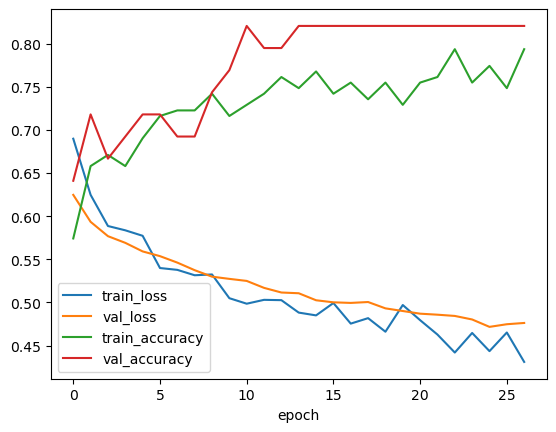

In [181]:
plt.figure()

plt.plot(history4.history["loss"], label = "train_loss")
plt.plot(history4.history["val_loss"], label = "val_loss")

plt.plot(history4.history["accuracy"], label = "train_accuracy")
plt.plot(history4.history["val_accuracy"], label = "val_accuracy")

plt.legend()
plt.xlabel("epoch")
plt.show()

- 맘에 걸리는것은... 독립변수 뺄때 좀 이상한 기준으로 뺏다는 것이다...
- 이것은 분류 모델인데 다중공선성을 왜 체크하니!@!!!!!!!
- 그래도 함 해봤다...

In [183]:
val_labels2 = np.argmax(model4.predict(scaled_test), axis =-1)

print("예측값", val_labels2)
print("정답값", y_test.values)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
예측값 [0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1
 1 1]
정답값 [False False  True False  True False False  True False  True  True  True
 False False  True False  True False False  True False False False  True
  True  True  True False False  True  True False  True False False  True
 False  True  True]
